<h1><center>CSCI 6515 - Machine Learning for Big Data (Fall 2023)</h1></center>
<h1><center>Final Project</h1></center>

<b>Group_ID: <code>replace with your group id here</code><b>

<b>Group Members:</b>  

1. <code>Deep_Pravinbhai_B00938094</code>
2. <code>Kush_B00928066</code>


# 1. Dataset Information

<h4> Dataset Name: <code> Bollywood Young Gen</code></h4>
<h4> Link to the Dataset: <code>https://drive.google.com/drive/folders/1d-1xCFzd_m-gpVg_wv0yHhHCCYr6fHjr?usp=drive_link</code> </h4>
<h4> Dataset Description: </h4>
<code> The Young Generation Bollywood Actors and Actresses Image Dataset is a comprehensive collection of 2,548 images showcasing 21 prominent figures from the entertainment industry. The dataset encompasses a diverse range of actors and actresses, providing a rich resource for various computer vision and machine learning applications.<br/> <br/>
<b>Data Collection:</b>
The dataset was meticulously curated using the "Image Downloader - Image Finder" Chrome extension, a tool designed for efficient bulk image scraping. Images were gathered at a resolution of 128x128 pixels and higher, ensuring a sufficient level of detail for analysis. On average, each individual actor or actress is represented by a substantial collection ranging from 90 to 180 images.<br/><br/>
<b>Organizational Structure:</b>
To enhance accessibility and ease of use, the dataset is structured in a systematic manner. Each actor's or actress's images are organized into individual folders, with each folder named after the respective personality. This hierarchical organization facilitates seamless navigation and retrieval of specific data, promoting an efficient workflow for researchers and developers.<br/><br/>
<b>Actor Diversity:</b>
The dataset features a diverse array of Bollywood actors and actresses, encompassing various genres, age groups, and career stages. This diversity allows for robust model training and testing across a wide spectrum of visual characteristics.
 </code>


# 2. Task Information

<h4> Task Goal: <code> Identifying and classifying Bollywood actors and actress from facial images </code></h4>
<h4> Task Description: </h4>
    <code> To enhance data quality, manual cleaning is conducted to eliminate misclassified images associated with specific individuals from Bollywood. Duplicate removal is carried out through a two-step process: first, exact duplicates are identified using hash functions, and then similar images are eliminated based on the Z transformation using dhash.<br/><br/>
    To address class imbalance and reduce overfitting, data points are strategically reduced through random data selection and/or class elimination.<br/><br/>
    The classification task utilizes multiple machine learning models:<br/>
    <b>CNN (Convolutional Neural Network)</b>: Beneficial for image classification due to its ability to capture spatial hierarchies and patterns in images.<br/>
    <b>SVM (Support Vector Machine)</b>: Effective for binary and multiclass classification, SVMs are known for their versatility and robust performance.<br/>
    <b>Linear Regression</b>: Though primarily used for regression tasks, it can be applied to binary classification problems and serves as a baseline model for comparison.<br/>
    <b>Random Forest</b>: A versatile ensemble learning algorithm, beneficial for handling large datasets with high dimensionality and capturing complex relationships.<br/><br/>
    Evaluation involves assessing classification results and scores, comparing the performance of different models to determine the most effective approach for the given image classification task.</code>

# 3. Task Implementation: Coding

### 3.1 Preprocessing

In [ ]:
import pandas as pd
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
PATH_TO_BOLLYWOOD_2="/content/drive/MyDrive/CSCI6515_Project_dataset/project_dataset_ml_6515/bollywood/2"
PATH_TO_BOLLYWOOD_2_CROP="/content/drive/MyDrive/CSCI6515_Project_dataset/project_dataset_ml_6515/bollywood/2/cropped"

#### Applying Cropping Techniques on Single Image

In [ ]:
img1=cv2.imread(PATH_TO_BOLLYWOOD_2+"/Ayushmann Khurrana/download (1).jpeg")

In [ ]:
img1.shape

(1080, 1920, 3)

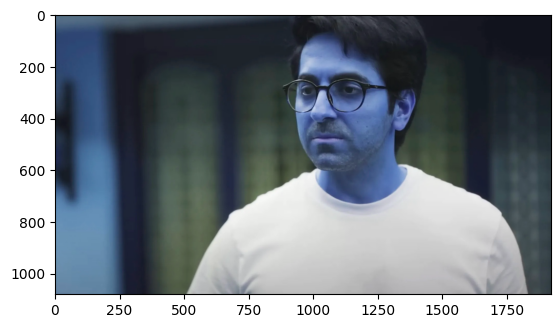

In [ ]:
plt.imshow(img1)

In [ ]:
gray=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

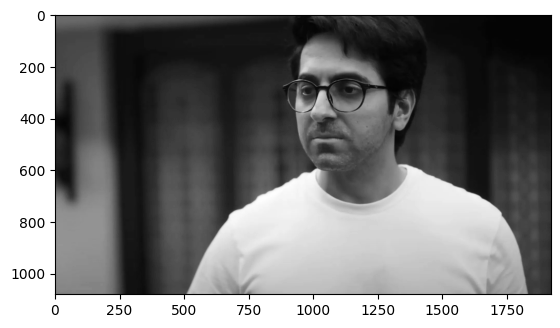

In [ ]:
plt.imshow(gray,cmap='gray')

In [ ]:
faceCascade = cv2.CascadeClassifier('/content/drive/MyDrive/CSCI6515_Project_dataset/haarcascades/haarcascade_frontalface_default.xml');

In [ ]:
eyeCascade= cv2.CascadeClassifier('/content/drive/MyDrive/CSCI6515_Project_dataset/haarcascades/haarcascade_eye.xml')

In [ ]:
face1=faceCascade.detectMultiScale(gray,1.3,5)

In [ ]:
face1

array([[823, 111, 463, 463]], dtype=int32)

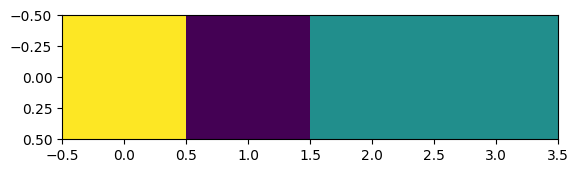

In [ ]:
plt.imshow(face1)

**Descriptive Analysis:** This show the

In [ ]:
x,y,w,h=face1[0]

In [ ]:
face_img=cv2.rectangle(img1,(x,y),(x+w,y+h),(255,0,0),2)

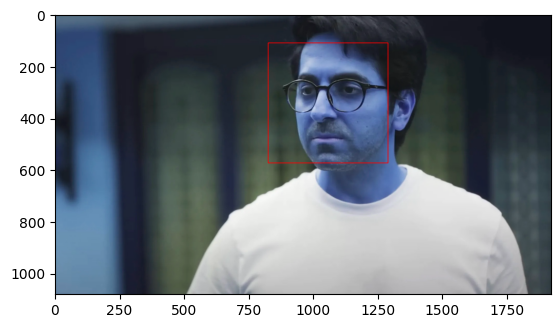

In [ ]:
plt.imshow(face_img)

**Descriptive Analysis:**

Plot shows the bounding box over the detected face in the image

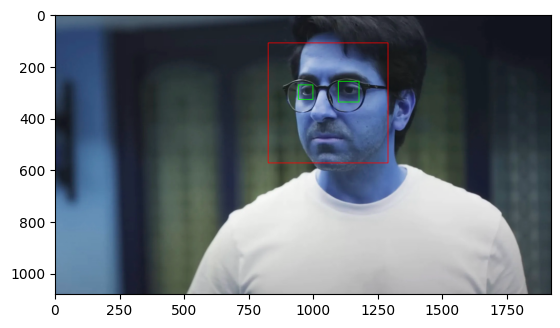

In [ ]:
cv2.destroyAllWindows()
for (x,y,w,h) in face1:
    face_img = cv2.rectangle(img1,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eyeCascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

**Descriptive Analysis:**

Plot shows the dimesion eye detection and creating green bound boxes for the same

In [ ]:
def get_cropped_faces(image_path):
    img = cv2.imread(image_path)

    if img is None:
        print("Error: Unable to load the image. Please check the file path.", image_path)
        return

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.2, 4)
    roi_colors = []
    for (x,y,w,h) in faces:
        print("faces detected:", len(faces))
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eyeCascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            roi_colors.append(roi_color)
    return roi_colors

**Descriptive Analysis:**

Funtion to get cropped image for the provided image path. It finds the all the detected faces and returns an array of images for the same

In [ ]:
cropped_faces = get_cropped_faces(PATH_TO_BOLLYWOOD_2+"/Ayushmann Khurrana/download (1).jpeg")

faces detected: 1


In [ ]:
cropped_faces

[array([[[ 29,  35,  46],
         [ 29,  35,  46],
         [ 29,  35,  46],
         ...,
         [ 38,  40,  50],
         [ 38,  40,  50],
         [ 38,  40,  50]],
 
        [[ 29,  36,  45],
         [ 29,  36,  45],
         [ 29,  35,  46],
         ...,
         [ 39,  42,  50],
         [ 40,  43,  51],
         [ 41,  44,  52]],
 
        [[ 29,  36,  45],
         [ 29,  36,  45],
         [ 29,  35,  46],
         ...,
         [ 39,  42,  50],
         [ 40,  43,  51],
         [ 41,  44,  52]],
 
        ...,
 
        [[ 91, 107,  84],
         [ 91, 107,  84],
         [ 91, 107,  84],
         ...,
         [ 88, 123, 186],
         [ 89, 124, 187],
         [ 90, 125, 188]],
 
        [[ 91, 107,  84],
         [ 91, 107,  84],
         [ 91, 107,  84],
         ...,
         [ 88, 123, 186],
         [ 89, 124, 187],
         [ 89, 124, 187]],
 
        [[ 91, 107,  84],
         [ 91, 107,  84],
         [ 91, 107,  84],
         ...,
         [ 88, 123, 186],
  

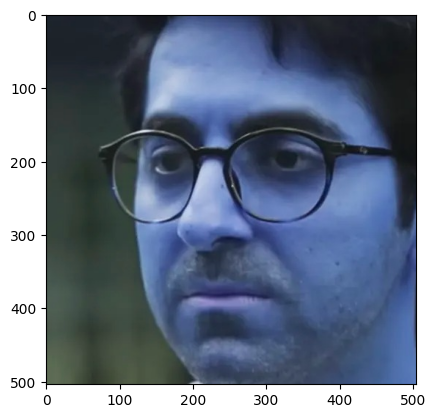

In [ ]:
plt.imshow(cropped_faces[0])

**Descriptive Analysis:**

Plot shows the final cropped image.

#### Generating Cropped Images

In [ ]:
import os

def get_image_dir(dir_path):
  img_dirs = []
  for entry in os.scandir(dir_path):
      if entry.is_dir():
          img_dirs.append(entry.path)
  return img_dirs

**Descriptive Analysis:**

A function to return image directories provided the root directory path

In [ ]:
import shutil

def create_cropped_dir_if_absent(dir_path):
  if os.path.exists(dir_path):
      shutil.rmtree(dir_path)

  os.mkdir(dir_path)

**Descriptive Analysis:**

Function creates cropped directory if absent to store all cropped images for actors and actress'

In [ ]:
def get_cropped_faces_w_gs(image_path):
    img = cv2.imread(image_path)

    if img is None:
        print("Error: Unable to load the image. Please check the file path.", image_path)
        return

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    for scale_factor in [1.2, 1.3, 1.4]:
        for min_neighbors in [3, 4, 5]:
            faces = faceCascade.detectMultiScale(gray, scaleFactor=scale_factor, minNeighbors=min_neighbors)
            roi_colors = []
            for (x, y, w, h) in faces:
                print("Faces detected:", len(faces))
                roi_gray = gray[y:y + h, x:x + w]
                roi_color = img[y:y + h, x:x + w]
                eyes = eyeCascade.detectMultiScale(roi_gray)
                if len(eyes) >= 2:
                    roi_colors.append(roi_color)
    return roi_colors

**Descriptive Analysis:**

The function performs grid serach to maximize the numbers of faces detected from a given image. It tunes `scaleFactor` and `minNeighours`

In [ ]:
def generate_croppped_data(data_path, cropped_data_path):

  image_dirs = get_image_dir(data_path)
  create_cropped_dir_if_absent(cropped_data_path)

  cropped_image_dirs = []
  celeb_file_names_dict = {}
  total_count = 1
  for img_dir in image_dirs:
      count = 1
      celebrity_name = img_dir.split('/')[-1]
      if(celebrity_name == "cropped"):
          return [image_dirs, cropped_image_dirs]
      print("Celebrity:\t", celebrity_name)
      print("----------------------------------------------")

      celeb_file_names_dict[celebrity_name] = []

      for entry in os.scandir(img_dir):
          extension = entry.name.split('.')[-1]
          # change function here to get_cropped_faces() if grid search is not required for parameter tuning
          roi_colors = get_cropped_faces_w_gs(entry.path)
          if roi_colors is not None:
              cropped_folder = cropped_data_path + "/" + celebrity_name
              if not os.path.exists(cropped_folder):
                  os.makedirs(cropped_folder)
                  cropped_image_dirs.append(cropped_folder)
                  print("Generating cropped images in folder: ",cropped_folder)
              for roi_color in roi_colors:
                  cropped_file_name = celebrity_name + str(count) + "." + extension
                  cropped_file_path = cropped_folder + "/" + cropped_file_name
                  cv2.imwrite(cropped_file_path, roi_color)
                  celeb_file_names_dict[celebrity_name].append(cropped_file_path)
                  count += 1
      total_count += count
      print("Total faces:", total_count)

  return [image_dirs, cropped_image_dirs]

**Descriptive Analysis:**

This function generates cropped images from all the dataset by providing root directory path of dataset and path to store cropped data.

In [ ]:
bollywood2_img_dirs, cr_bollywood2_img_dirs = generate_croppped_data(PATH_TO_BOLLYWOOD_2, PATH_TO_BOLLYWOOD_2_CROP)

**Descriptive Analysis:**

Cropped images are generated after this step. They need to be manually cleaned to match desired class labels.

#### Pre-processing After Manual Data Cleaning



In [ ]:
PREPROCESSED_BOLLYWOOD2_PATH="/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/cropped/2"

In [ ]:
img_dirs = get_image_dir(PREPROCESSED_BOLLYWOOD2_PATH)

In [ ]:
img_dirs

['/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/cropped/2/Janhvi Kapoor',
 '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/cropped/2/Ayushmann Khurrana',
 '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/cropped/2/Kartik Aaryan',
 '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/cropped/2/Vicky Kaushal',
 '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/cropped/2/Shahid Kapoor',
 '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/cropped/2/Sara Ali Khan',
 '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/cropped/2/Ananya Panday',
 '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/cropped/2/Sushant Singh Rajput',
 '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/cropped/2/Siddharth Malhotra',
 '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/cropped/2

In [ ]:
celeb_file_names_dict = {}
for img_dir in img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celeb_file_names_dict[celebrity_name] = file_list
celeb_file_names_dict

{'Janhvi Kapoor': ['/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/cropped/2/Janhvi Kapoor/Janhvi Kapoor2.jpg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/cropped/2/Janhvi Kapoor/Janhvi Kapoor1.jpg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/cropped/2/Janhvi Kapoor/Janhvi Kapoor4.jpeg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/cropped/2/Janhvi Kapoor/Janhvi Kapoor5.jpeg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/cropped/2/Janhvi Kapoor/Janhvi Kapoor6.jpg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/cropped/2/Janhvi Kapoor/Janhvi Kapoor12.jpeg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/cropped/2/Janhvi Kapoor/Janhvi Kapoor13.jpg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/cropped/2/Janhvi Kapoor/Janhvi Kapoor14.jpg',
  '/content/drive

['Janhvi Kapoor', 'Ayushmann Khurrana', 'Kartik Aaryan', 'Vicky Kaushal', 'Shahid Kapoor', 'Sara Ali Khan', 'Ananya Panday', 'Sushant Singh Rajput', 'Siddharth Malhotra', 'Arjun Kapoor', 'Disha Patani', 'Kiara Advani', 'Imageye - Rajkummar Rao - Google Search', 'Tara Sutaria', 'John Abraham', 'Kriti Kharbanda', 'Kajol', 'Bhumi Pednekar', 'Fatima Sana Shaikh', 'Tiger shroff', 'Radhika Madan'] [100, 75, 88, 57, 47, 99, 102, 119, 81, 59, 95, 108, 44, 60, 55, 102, 129, 115, 80, 67, 100]


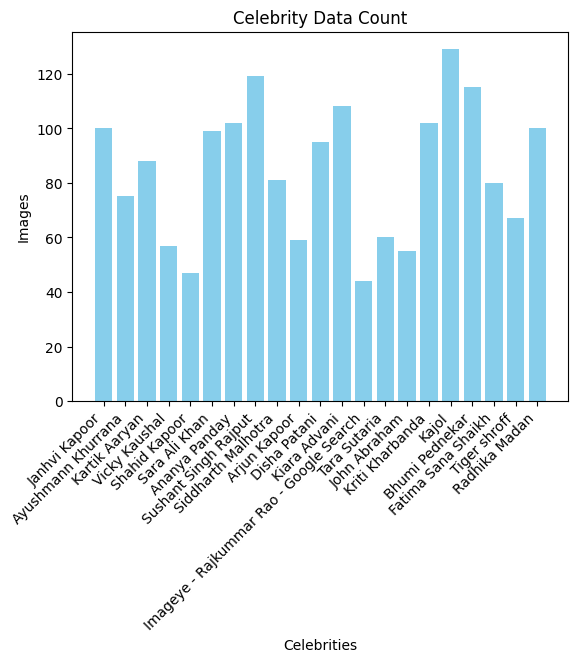

In [ ]:
celebrities = list(celeb_file_names_dict.keys())
img_count = [len(images) for images in celeb_file_names_dict.values()]
print(celebrities, img_count)

plt.bar(celebrities, img_count, color='skyblue')
plt.xlabel('Celebrities')
plt.ylabel('Images')
plt.title('Celebrity Data Count')
plt.xticks(rotation=45, ha='right')
plt.show()

**Descriptive Analysis:**

Plot shows the classwise no. of image distribution.

In [ ]:
class_dict = {}
count = 0
for celebrity_name in celeb_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Janhvi Kapoor': 0,
 'Ayushmann Khurrana': 1,
 'Kartik Aaryan': 2,
 'Vicky Kaushal': 3,
 'Shahid Kapoor': 4,
 'Sara Ali Khan': 5,
 'Ananya Panday': 6,
 'Sushant Singh Rajput': 7,
 'Siddharth Malhotra': 8,
 'Arjun Kapoor': 9,
 'Disha Patani': 10,
 'Kiara Advani': 11,
 'Imageye - Rajkummar Rao - Google Search': 12,
 'Tara Sutaria': 13,
 'John Abraham': 14,
 'Kriti Kharbanda': 15,
 'Kajol': 16,
 'Bhumi Pednekar': 17,
 'Fatima Sana Shaikh': 18,
 'Tiger shroff': 19,
 'Radhika Madan': 20}


##### Reducing Data Redundancy

In [ ]:
import hashlib

In [ ]:
def get_file_hash(filepath):
    with open(filepath, 'rb') as f:
        return md5(f.read()).hexdigest()

**Descriptive Analysis:**

Function to get md5 hash after reading the image

In [ ]:
# [Removing Duplicate Images through Python](https://medium.com/@urvisoni/removing-duplicate-images-through-python-23c5fdc7479e)
duplicates = []
hash_keys = dict()
for celebrity, image_paths in celeb_file_names_dict.items():
    for path in image_paths:
      if os.path.isfile(path):
          with open(path, 'rb') as f:
              filehash = hashlib.md5(f.read()).hexdigest()
          if filehash not in hash_keys:
              hash_keys[filehash] = celebrity
          else:
              duplicates.append((celebrity,hash_keys[filehash], path))

**Descriptive Analysis:**

This gives an array `duplicates` where the duplicate images from the cropped images are found.

In [ ]:
duplicates

[(21,
  21,
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/cropped/2/Arjun Kapoor/Arjun Kapoor7.jpg'),
 (21,
  21,
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/cropped/2/Arjun Kapoor/Arjun Kapoor8.jpg')]

**Descriptive Analysis:**

Provided images are removed from the cropped dataset.

In [ ]:
# [Removing Duplicate or Similar Images in Python](https://towardsdatascience.com/removing-duplicate-or-similar-images-in-python-93d447c1c3eb)
!pip install imagehash
import imagehash
from PIL import Image

def alpharemover(image):
    if image.mode != 'RGBA':
        return image
    canvas = Image.new('RGBA', image.size, (255,255,255,255))
    canvas.paste(image, mask=image)
    return canvas.convert('RGB')

def with_ztransform_preprocess(hashfunc, hash_size=8):
    def function(path):
        image = alpharemover(Image.open(path))
        image = image.convert("L").resize((hash_size, hash_size), Image.ANTIALIAS)
        data = image.getdata()
        quantiles = np.arange(100)
        quantiles_values = np.percentile(data, quantiles)
        zdata = (np.interp(data, quantiles_values, quantiles) / 100 * 255).astype(np.uint8)
        image.putdata(zdata)
        return hashfunc(image)
    return function
dhash_z_transformed = with_ztransform_preprocess(imagehash.dhash, hash_size = 10)

**Descriptive Analysis:**

Functions to handle removal of duplicate or similar images using z-tranformation.

In [ ]:
duplicates_z_transform = []
hash_keys_z_transform = dict()
for celebrity, image_paths in celeb_file_names_dict.items():
    for path in image_paths:
        if not path.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            continue
        if os.path.isfile(path):
            with open(path, 'rb') as f:
                filehash = dhash_z_transformed(path)
                print(f"{path}: {filehash}")

            if filehash not in hash_keys_z_transform:
                hash_keys_z_transform[filehash] = path
            else:
                duplicates_z_transform.append((path, hash_keys_z_transform[filehash]))

<ipython-input-75-7c6826be5267>:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.convert("L").resize((hash_size, hash_size), Image.ANTIALIAS)


/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/cropped/2/Janhvi Kapoor/Janhvi Kapoor2.jpg: 61f0b2f2ccccccec
/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/cropped/2/Janhvi Kapoor/Janhvi Kapoor1.jpg: 33717174686969e9
/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/cropped/2/Janhvi Kapoor/Janhvi Kapoor4.jpeg: f8f0b2325a1a361d
/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/cropped/2/Janhvi Kapoor/Janhvi Kapoor5.jpeg: 337970f4dcdcd8bc
/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/cropped/2/Janhvi Kapoor/Janhvi Kapoor6.jpg: 717171f4cccccc70
/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/cropped/2/Janhvi Kapoor/Janhvi Kapoor12.jpeg: 7361f4f4c8ecf838
/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/cropped/2/Janhvi Kapoor/Janhvi Kapoor13.jpg: 60f072686cecec68
/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bo

**Descriptive Analysis:**

Duplicate or similar images are detected using z-tranformation and stored in `duplicates_z_transform` array.

In [ ]:
duplicates_z_transform

[('/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/cropped/2/Ayushmann Khurrana/Ayushmann Khurrana82.jpg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/cropped/2/Ayushmann Khurrana/Ayushmann Khurrana80.jpeg'),
 ('/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/cropped/2/Sara Ali Khan/Sara Ali Khan117.jpeg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/cropped/2/Sara Ali Khan/Sara Ali Khan9.jpg'),
 ('/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/cropped/2/Ananya Panday/Ananya Panday122.jpeg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/cropped/2/Ananya Panday/Ananya Panday114.jpg'),
 ('/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/cropped/2/Sushant Singh Rajput/Sushant Singh Rajput99.jpeg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/cropped/2/Sushant Singh Rajput/Sush

##### Reducing Imbalanced Classes

In [ ]:
DC_BOLLYWOOD2_PATH="/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/deep_clean/2"

In [ ]:
dc_img_dirs = get_image_dir(DC_BOLLYWOOD2_PATH)

In [ ]:
dc_img_dirs

['/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/deep_clean/2/Kajol',
 '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/deep_clean/2/Kiara Advani',
 '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/deep_clean/2/Imageye - Rajkummar Rao - Google Search',
 '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/deep_clean/2/Tiger shroff',
 '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/deep_clean/2/Bhumi Pednekar',
 '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/deep_clean/2/Radhika Madan',
 '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/deep_clean/2/Kriti Kharbanda',
 '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/deep_clean/2/Tara Sutaria',
 '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/deep_clean/2/Fatima Sana Shaikh',
 '/content/drive/MyDrive/CSCI6515_Project_dataset/

In [ ]:
dc_celeb_file_names_dict = {}
for img_dir in dc_img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    dc_celeb_file_names_dict[celebrity_name] = file_list
dc_celeb_file_names_dict

{'Kajol': ['/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/deep_clean/2/Kajol/Kajol2.jpeg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/deep_clean/2/Kajol/Kajol1.jpeg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/deep_clean/2/Kajol/Kajol4.jpeg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/deep_clean/2/Kajol/Kajol3.jpeg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/deep_clean/2/Kajol/Kajol5.jpg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/deep_clean/2/Kajol/Kajol6.jpeg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/deep_clean/2/Kajol/Kajol8.jpg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/deep_clean/2/Kajol/Kajol7.jpg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_bollywood/deep_clean/2/Kajol/Kajol9.jpg',
  '/content/drive/MyDri

[100, 75, 88, 57, 47, 99, 102, 119, 81, 59, 95, 108, 44, 60, 55, 102, 129, 115, 80, 67, 100]


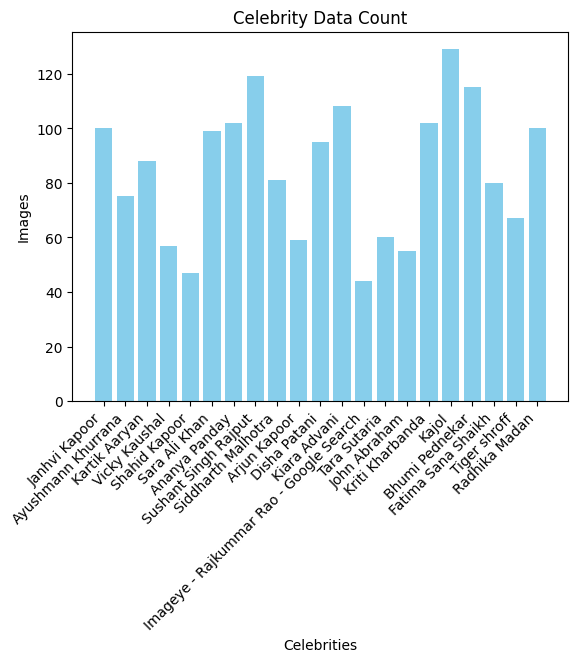

In [ ]:
dc_celebrities = list(dc_celeb_file_names_dict.keys())
dc_img_count = [len(images) for images in dc_celeb_file_names_dict.values()]
print(img_count)

plt.bar(celebrities, img_count, color='skyblue')
plt.xlabel('Celebrities')
plt.ylabel('Images')
plt.title('Celebrity Data Count')
plt.xticks(rotation=45, ha='right')
plt.show()

**Descriptive Analysis:**

Plot show the classwise distribution of the data.

In [ ]:
dc_class_dict = {}
count = 0
for celebrity_name in dc_celeb_file_names_dict.keys():
    dc_class_dict[celebrity_name] = count
    count = count + 1
dc_class_dict

{'Kajol': 0,
 'Kiara Advani': 1,
 'Imageye - Rajkummar Rao - Google Search': 2,
 'Tiger shroff': 3,
 'Bhumi Pednekar': 4,
 'Radhika Madan': 5,
 'Kriti Kharbanda': 6,
 'Tara Sutaria': 7,
 'Fatima Sana Shaikh': 8,
 'John Abraham': 9,
 'Sushant Singh Rajput': 10,
 'Kartik Aaryan': 11,
 'Shahid Kapoor': 12,
 'Siddharth Malhotra': 13,
 'Ananya Panday': 14,
 'Ayushmann Khurrana': 15,
 'Vicky Kaushal': 16,
 'Disha Patani': 17,
 'Sara Ali Khan': 18,
 'Arjun Kapoor': 19,
 'Janhvi Kapoor': 20}



# Reducing Data Redundancy

### 3.2 Model development and training

In [ ]:
X_dc, y_dc = [], []
pro_count=0
for celebrity_name, training_files in dc_celeb_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        pro_count+=1
        print(pro_count)
        if img is None:
          continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        scalled_raw_img=scalled_raw_img.reshape(32*32*3,1)

        X_dc.append(scalled_raw_img)
        y_dc.append(dc_class_dict[celebrity_name])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


**Descriptive Analysis:**

Scaling images to 32x32 pixels.

In [ ]:
X_dc = np.array(X_dc)
X_dc.shape

(1746, 3072, 1)

#### CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import keras
from sklearn.model_selection import train_test_split


model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Dense layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(21, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.AdamW(), metrics=['accuracy'], run_eagerly=True)


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [ ]:
X_dc = np.array(X_dc).reshape(1746, 3072).astype(float)
X_dc_train, X_dc_test, y_dc_train, y_dc_test = train_test_split(X_dc, y_dc, random_state=42)

**Descriptive Analysis:**

Reshaping back for making it compatible for other algorithms.

In [ ]:
print(X_dc_test.shape, X_dc_train.shape, len(y_dc_train), len(y_dc_test))

(437, 3072) (1309, 3072) 1309 437


In [ ]:
print(X_dc_train.shape)

(1309, 3072)


In [ ]:
print(X_dc_test.shape)


(437, 3072)


In [ ]:
def reshape_to_images(data):
    # Reshape each vector to 32x32x3 image format
    num_samples = data.shape[0]
    return data.reshape(num_samples, 32, 32, 3)

X_dc_train_images = reshape_to_images(X_dc_train)
X_dc_test_images = reshape_to_images(X_dc_test)


**Descriptive Analysis:**

Function to reshape images for performing CNN.

In [ ]:
from tensorflow.keras.utils import to_categorical

print('----------------------')
print (X_dc_train_images.shape)
y_dc_train_encoded = to_categorical(y_dc_train, num_classes=21)
y_dc_test_encoded = to_categorical(y_dc_test, num_classes=21)

----------------------
(1309, 32, 32, 3)


In [ ]:
import numpy as np

epoch_history = model.fit(X_dc_train_images, y_dc_train_encoded, epochs=100)

Epoch 1/100
41/41 [==============================] - 4s 84ms/step - loss: 7.3798 - accuracy: 0.0527
Epoch 2/100
41/41 [==============================] - 3s 84ms/step - loss: 2.9272 - accuracy: 0.1047
Epoch 3/100
41/41 [==============================] - 3s 70ms/step - loss: 2.7372 - accuracy: 0.1581
Epoch 4/100
41/41 [==============================] - 3s 71ms/step - loss: 2.5090 - accuracy: 0.2108
Epoch 5/100
41/41 [==============================] - 3s 69ms/step - loss: 2.3163 - accuracy: 0.2735
Epoch 6/100
41/41 [==============================] - 4s 95ms/step - loss: 2.0592 - accuracy: 0.3575
Epoch 7/100
41/41 [==============================] - 3s 72ms/step - loss: 1.8808 - accuracy: 0.4125
Epoch 8/100
41/41 [==============================] - 3s 69ms/step - loss: 1.7658 - accuracy: 0.4423
Epoch 9/100
41/41 [==============================] - 3s 71ms/step - loss: 1.4765 - accuracy: 0.5157
Epoch 10/100
41/41 [==============================] - 3s 80ms/step - loss: 1.2428 - accuracy: 0.6035

In [ ]:
test_loss, test_accuracy = model.evaluate(X_dc_test_images, y_dc_test_encoded, verbose=0)
print(f'Test accuracy: {test_accuracy}')

Test accuracy: 0.4118993282318115


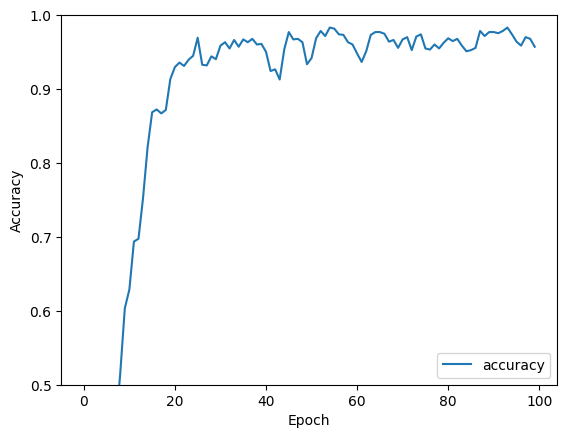

In [ ]:
plt.plot(epoch_history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

**Descriptive Analysis:**

Plot showing the change in accuracy over epochs.


#### Pipeline for training SVM, Random Forest and Linear Regression Model

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

**Descriptive Analysis:**

Creating model with possible parameters for hyperparameter tuning to find best model through running pipeline.

In [ ]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_dc_train, y_dc_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.466041,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.219262,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.399561,{'logisticregression__C': 1}


**Descriptive Analysis:**

Best scores hyperparameter tuning running grid search over all the provided models.

In [ ]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

### 3.3 Model evaluation

#### SVM

In [ ]:
best_estimators['svm'].score(X_dc_test,y_dc_test)


0.5011441647597255

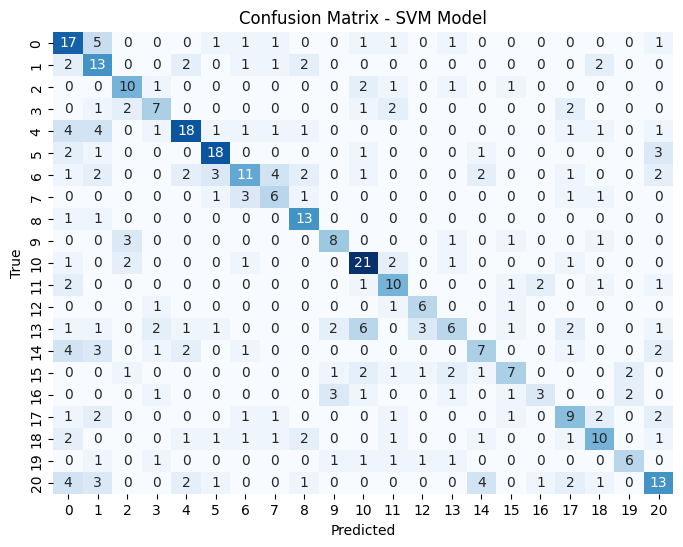

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_svm = best_estimators['svm'].predict(X_dc_test)

# Create a confusion matrix
cm_svm = confusion_matrix(y_dc_test, y_pred_svm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - SVM Model")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_dc_test, y_pred_svm))

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.59      0.48        29
           1       0.35      0.57      0.43        23
           2       0.56      0.62      0.59        16
           3       0.47      0.47      0.47        15
           4       0.64      0.53      0.58        34
           5       0.67      0.69      0.68        26
           6       0.52      0.35      0.42        31
           7       0.40      0.46      0.43        13
           8       0.59      0.87      0.70        15
           9       0.53      0.57      0.55        14
          10       0.55      0.72      0.63        29
          11       0.48      0.56      0.51        18
          12       0.55      0.67      0.60         9
          13       0.43      0.22      0.29        27
          14       0.44      0.33      0.38        21
          15       0.50      0.39      0.44        18
          16       0.50      0.25      0.33        12
    

#### Random Forest

In [ ]:
best_estimators['random_forest'].score(X_dc_test,y_dc_test)


0.2151029748283753

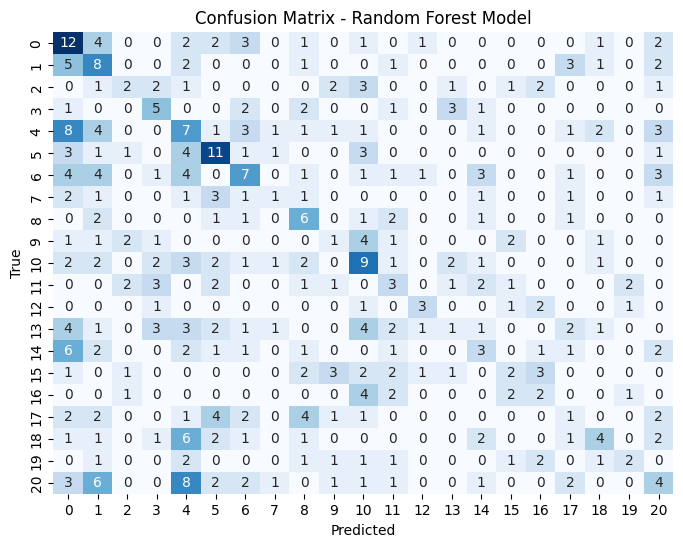

In [ ]:
y_pred_rf = best_estimators['random_forest'].predict(X_dc_test)

# Create a confusion matrix
cm_rf = confusion_matrix(y_dc_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Random Forest Model")
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_dc_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.41      0.29        29
           1       0.20      0.35      0.25        23
           2       0.22      0.12      0.16        16
           3       0.26      0.33      0.29        15
           4       0.15      0.21      0.17        34
           5       0.33      0.42      0.37        26
           6       0.27      0.23      0.25        31
           7       0.17      0.08      0.11        13
           8       0.24      0.40      0.30        15
           9       0.09      0.07      0.08        14
          10       0.24      0.31      0.27        29
          11       0.16      0.17      0.16        18
          12       0.43      0.33      0.38         9
          13       0.11      0.04      0.06        27
          14       0.18      0.14      0.16        21
          15       0.20      0.11      0.14        18
          16       0.17      0.17      0.17        12
    

#### Logistic Regression

In [ ]:
best_estimators['logistic_regression'].score(X_dc_test,y_dc_test)


0.41647597254004576

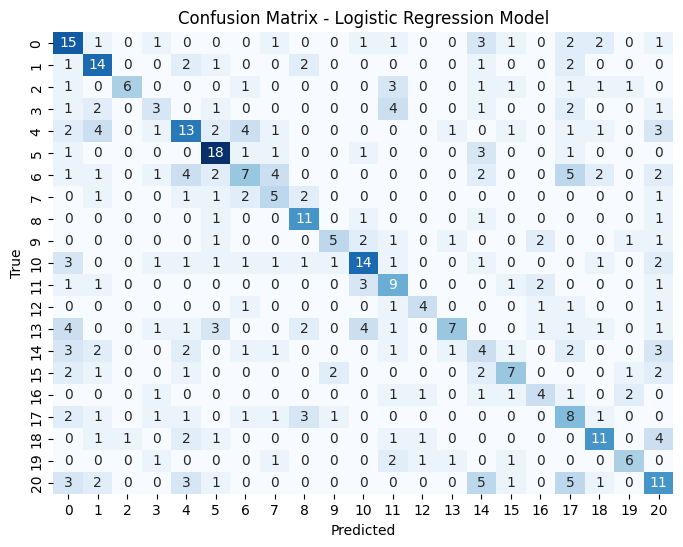

In [ ]:
y_pred_lr = best_estimators['logistic_regression'].predict(X_dc_test)

# Create a confusion matrix
cm_lr = confusion_matrix(y_dc_test, y_pred_lr)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Logistic Regression Model")
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_dc_test, y_pred_lr))

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.52      0.43        29
           1       0.45      0.61      0.52        23
           2       0.86      0.38      0.52        16
           3       0.27      0.20      0.23        15
           4       0.42      0.38      0.40        34
           5       0.55      0.69      0.61        26
           6       0.37      0.23      0.28        31
           7       0.31      0.38      0.34        13
           8       0.52      0.73      0.61        15
           9       0.56      0.36      0.43        14
          10       0.54      0.48      0.51        29
          11       0.35      0.50      0.41        18
          12       0.57      0.44      0.50         9
          13       0.64      0.26      0.37        27
          14       0.16      0.19      0.17        21
          15       0.47      0.39      0.42        18
          16       0.40      0.33      0.36        12
    

#### CNN

14/14 [==============================] - 0s 21ms/step


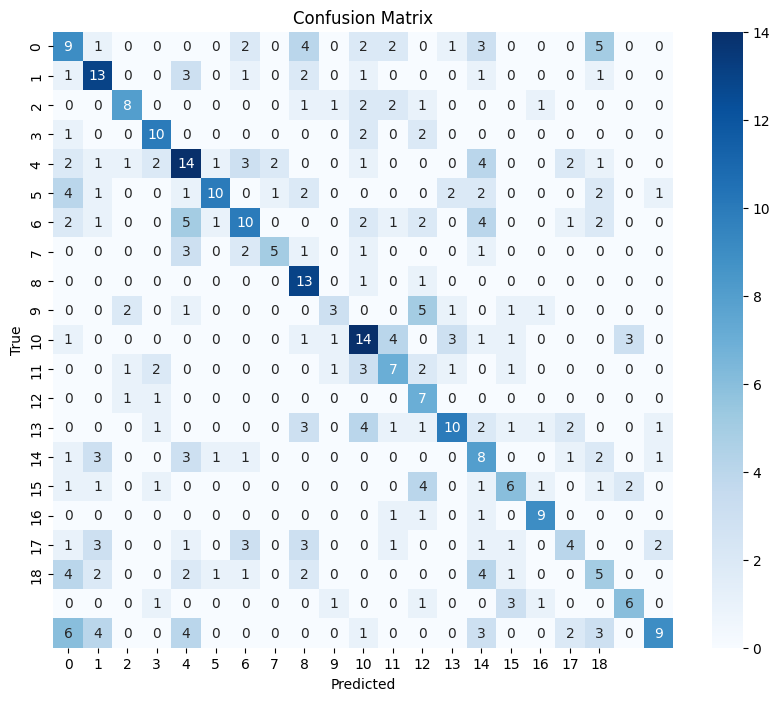

In [ ]:
y_pred_cnn = model.predict(X_dc_test_images)

# Convert the predictions to class labels
y_pred_classes = np.argmax(y_pred_cnn, axis=1)
y_true_classes = np.argmax(y_dc_test_encoded, axis=1)

# Create a confusion matrix
cm_cnn = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=range(19), yticklabels=range(19))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_dc_test, y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.31      0.29        29
           1       0.43      0.57      0.49        23
           2       0.62      0.50      0.55        16
           3       0.56      0.67      0.61        15
           4       0.38      0.41      0.39        34
           5       0.71      0.38      0.50        26
           6       0.43      0.32      0.37        31
           7       0.62      0.38      0.48        13
           8       0.41      0.87      0.55        15
           9       0.43      0.21      0.29        14
          10       0.41      0.48      0.44        29
          11       0.37      0.39      0.38        18
          12       0.26      0.78      0.39         9
          13       0.56      0.37      0.44        27
          14       0.22      0.38      0.28        21
          15       0.40      0.33      0.36        18
          16       0.64      0.75      0.69        12
    

### 3.4 Analysis

In [ ]:
def plot_classwise_bar(model_name, y_true, y_pred):
    num_classes = len(set(y_true))

    report = classification_report(y_true, y_pred, output_dict=True)

    metrics_dict = {
        'Precision': [report[str(i)]['precision'] for i in range(num_classes)],
        'Recall': [report[str(i)]['recall'] for i in range(num_classes)],
        'F1-Score': [report[str(i)]['f1-score'] for i in range(num_classes)]
    }

    metrics_df = pd.DataFrame(metrics_dict, index=[str(i) for i in range(num_classes)])

    # Plot class-wise bar plots
    plt.figure(figsize=(12, 8))
    metrics_df.plot(kind='bar', colormap='viridis', edgecolor='black')
    plt.title(f'Class-wise Metrics - {model_name}')
    plt.xlabel('Class')
    plt.ylabel('Score')
    plt.xticks(rotation=0)
    plt.legend(loc='upper right')
    plt.show()

<Figure size 1200x800 with 0 Axes>

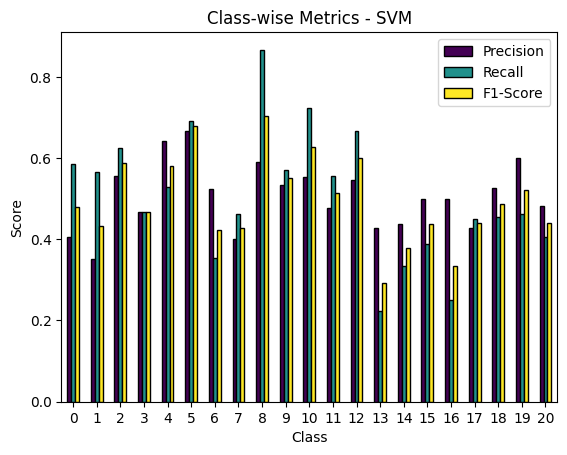

In [ ]:
plot_classwise_bar('SVM', y_dc_test, y_pred_svm)

<Figure size 1200x800 with 0 Axes>

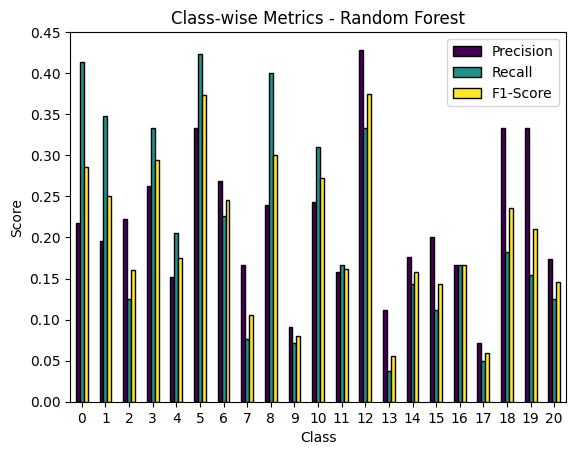

In [ ]:
plot_classwise_bar('Random Forest', y_dc_test, y_pred_rf)

<Figure size 1200x800 with 0 Axes>

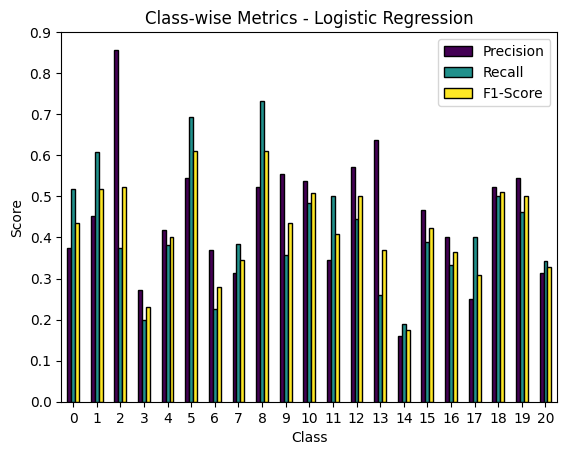

In [ ]:
plot_classwise_bar('Logistic Regression', y_dc_test, y_pred_lr)

<Figure size 1200x800 with 0 Axes>

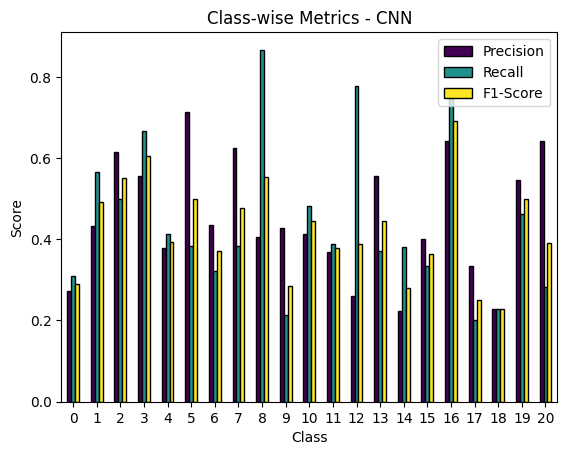

In [ ]:
plot_classwise_bar('CNN', y_dc_test, y_pred_classes)

**Descriptive Analysis:**

**SVM:**

    Accuracy: 50%
    Precision: Ranges from 40% to 67%
    Recall: Ranges from 25% to 87%
    F1-score: Ranges from 30% to 72%
The SVM model shows moderate overall performance. However, there is variation in precision, recall, and F1-score across different classes. The model performs well on some classes (e.g., class 5) but less effectively on others (e.g., class 2).

**Random Forest:**

    Accuracy: 22%
    Precision: Ranges from 9% to 43%
    Recall: Ranges from 4% to 69%
    F1-score: Ranges from 6% to 61%
The Random Forest model has lower accuracy compared to SVM. It exhibits a wide range of variation in precision, recall, and F1-score across different classes, indicating poor overall performance.

**Logistic Regression:**

    Accuracy: 42%
    Precision: Ranges from 16% to 86%
    Recall: Ranges from 8% to 73%
    F1-score: Ranges from 11% to 61%
Logistic Regression performs better than Random Forest but is still outperformed by SVM. It exhibits relatively consistent precision, recall, and F1-score across different classes.

**CNN:**

    Accuracy: 41%
    Precision: Ranges from 22% to 71%
    Recall: Ranges from 12% to 75%
    F1-score: Ranges from 15% to 69%
The CNN model shows competitive performance, outperforming Random Forest but lagging behind SVM and Logistic Regression in terms of accuracy. It exhibits variability in precision, recall, and F1-score across different classes.

**Conclusion:**
SVM outperforms the other models in terms of accuracy and exhibits a more balanced performance across different classes.
Logistic Regression performs reasonably well but has a slightly lower accuracy compared to SVM.
CNN shows competitive performance, but its accuracy is lower than that of SVM.
Random Forest performs the least effectively among the models evaluated.